In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import glob
import pandas as pd

In [18]:
# 1.设置参数
DATA_DIR_PATH = "./test_data"
OUTPUT_PATH = "./picture"
file_list  = []
# 2.设置映射
metric_map ={
    "f1":"F1",
    "mcc":"MCC",
    "precision":"Precision",
    "recall":"Recall"
}


In [19]:
# AQ1 heatmap config
plt_config = {
    "figsize":(20,9),
    "word_size":38,
    "x_size":30,
    "y_size":30,
    "y_label_size":30
}
# AQ1 esd heatmap config
# plt_config = {
#     "figsize":(20,9),
#     "word_size":58,
#     "x_size":28,
#     "y_size":28,
#     "y_label_size":28
# }

In [20]:
# 2.读取DATA_DIR_PATH下的所有xlsx文件
file_list = glob.glob(f"{DATA_DIR_PATH}/*.xlsx")
file_list

['./test_data\\f1#heatmap.xlsx',
 './test_data\\mcc#heatmap.xlsx',
 './test_data\\precision#heatmap.xlsx',
 './test_data\\recall#heatmap.xlsx']

f1
mcc
precision
recall


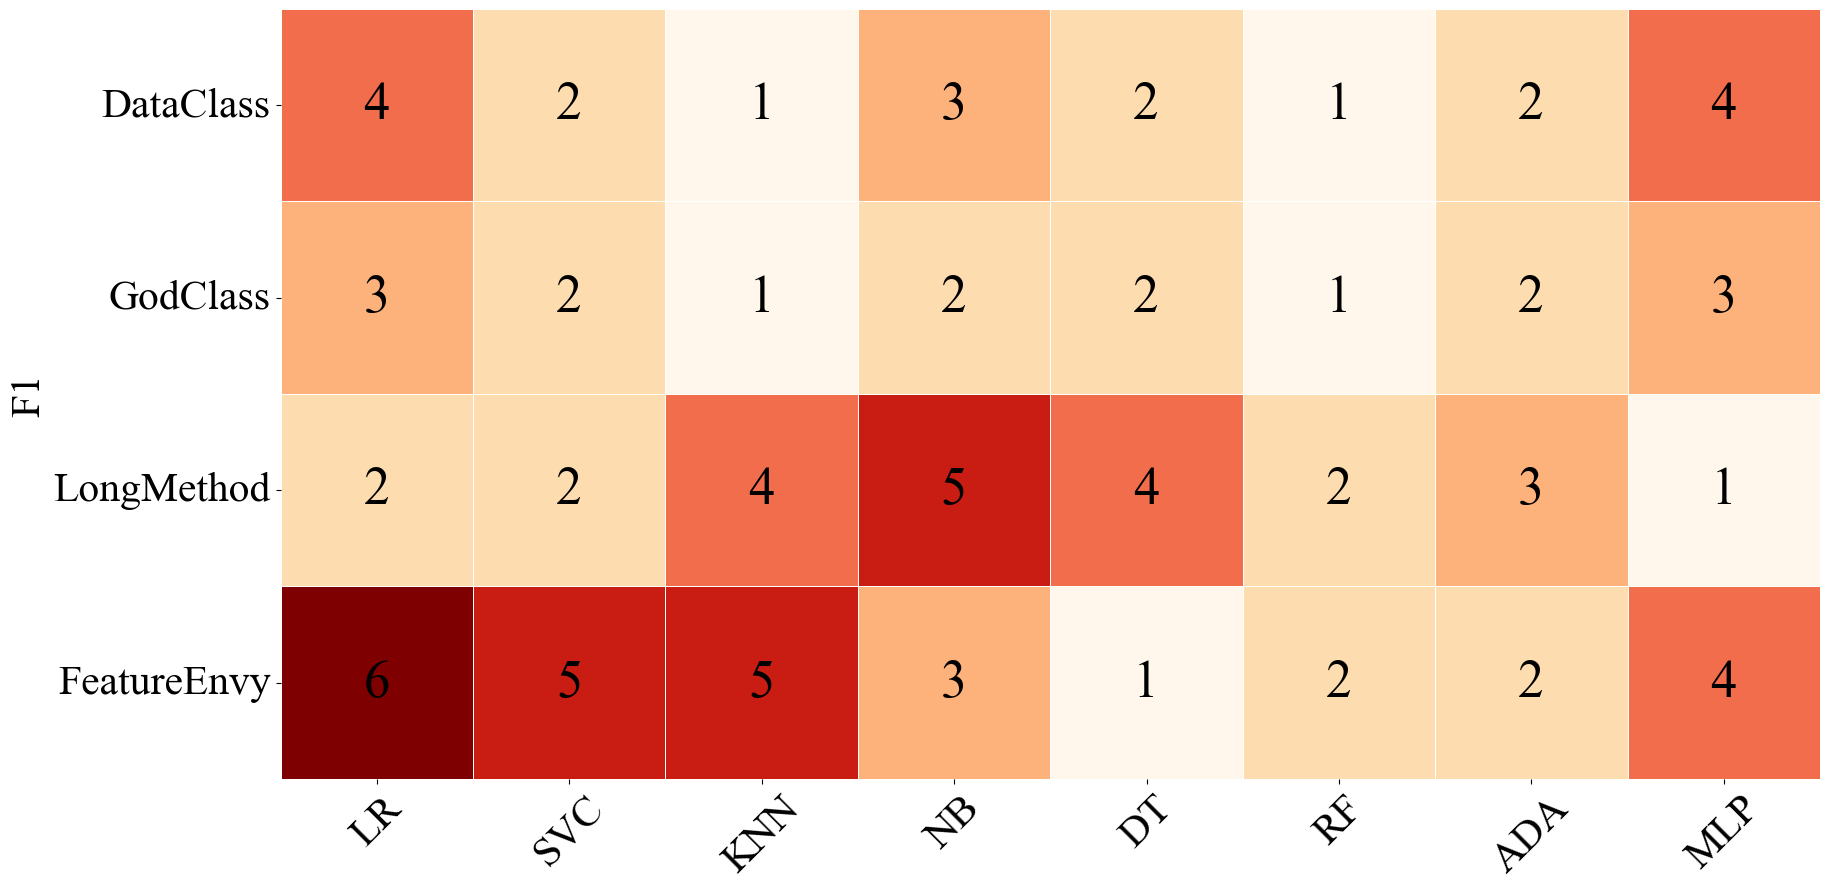

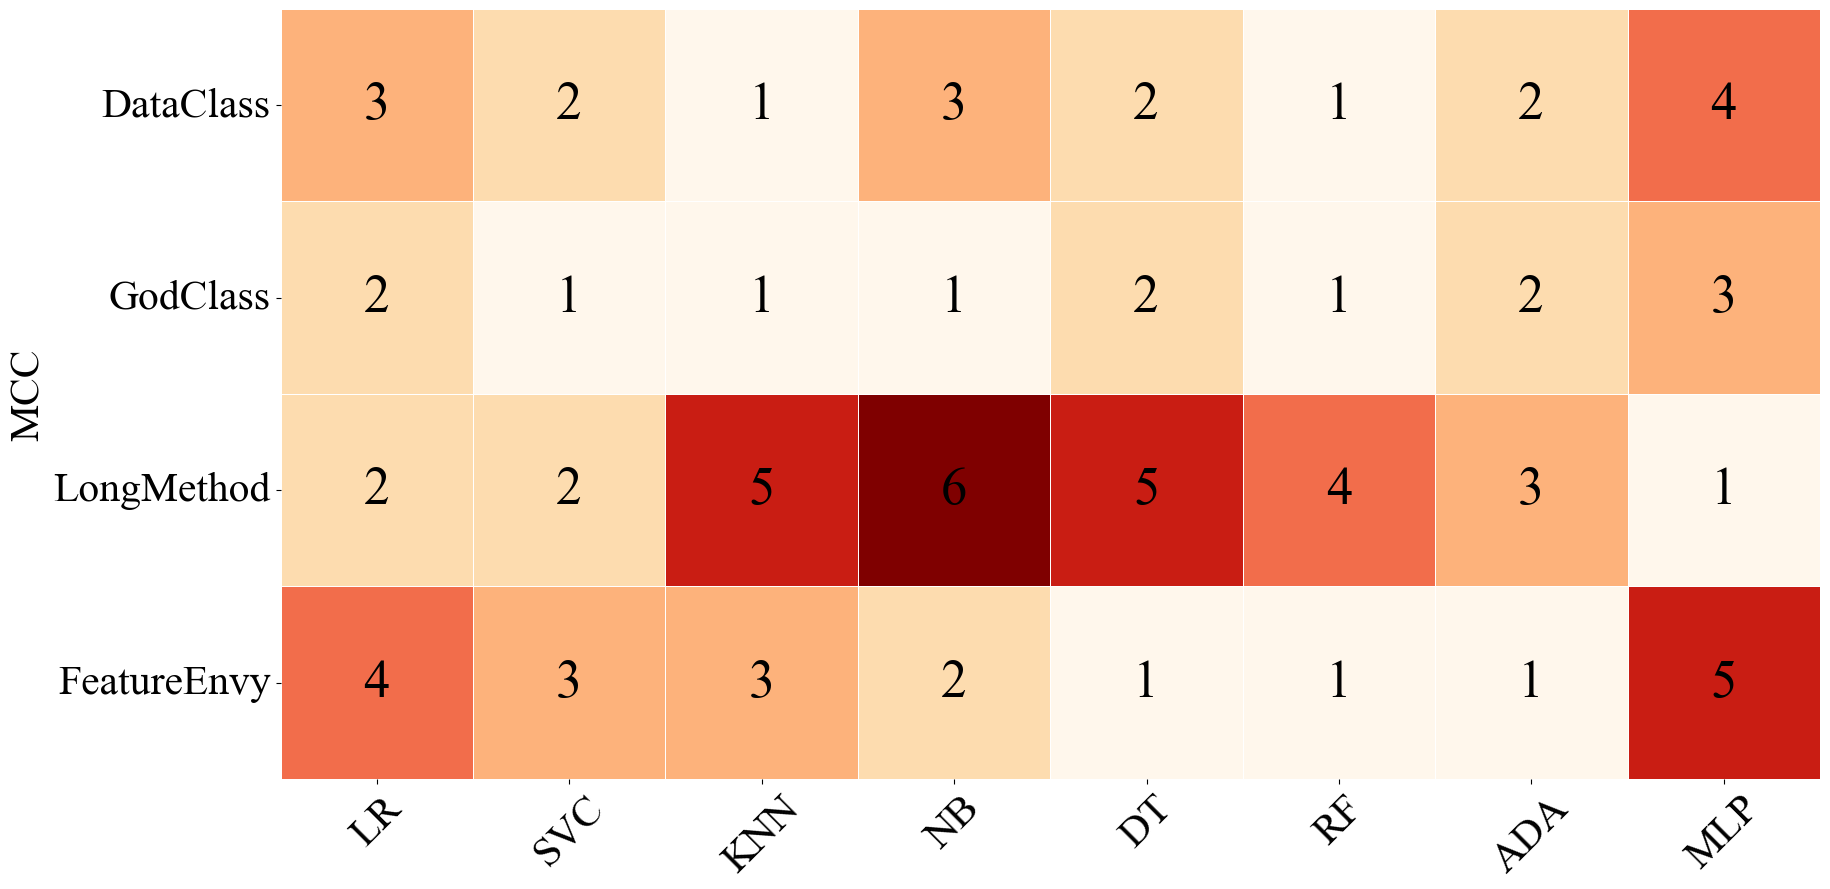

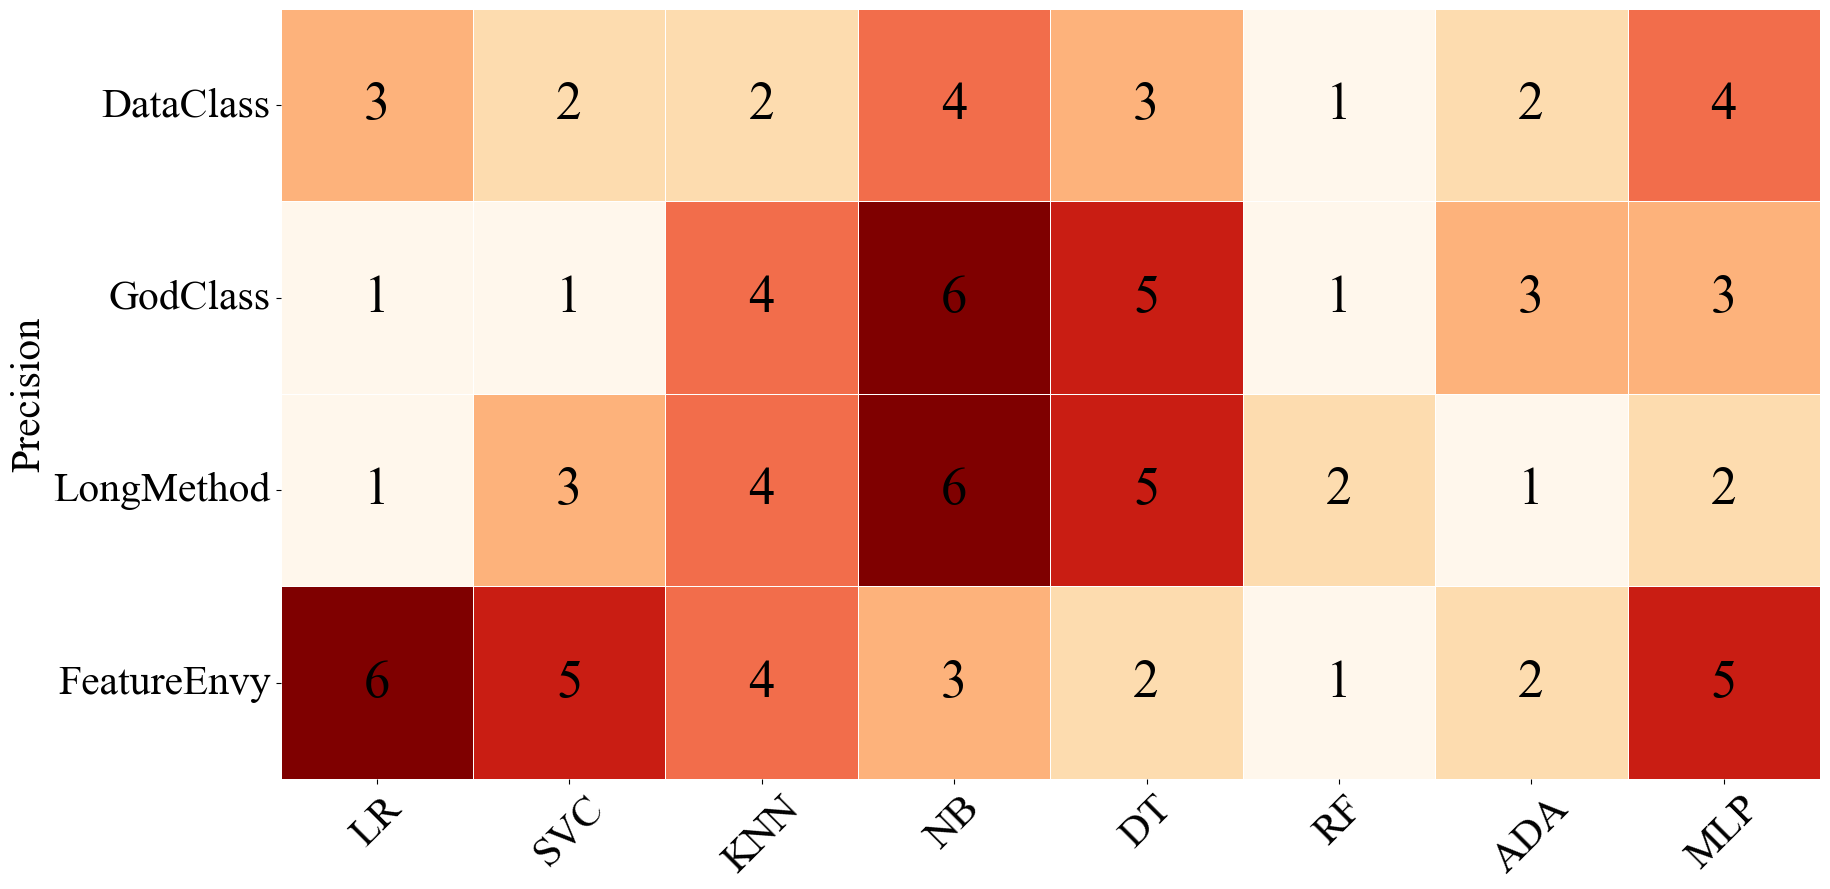

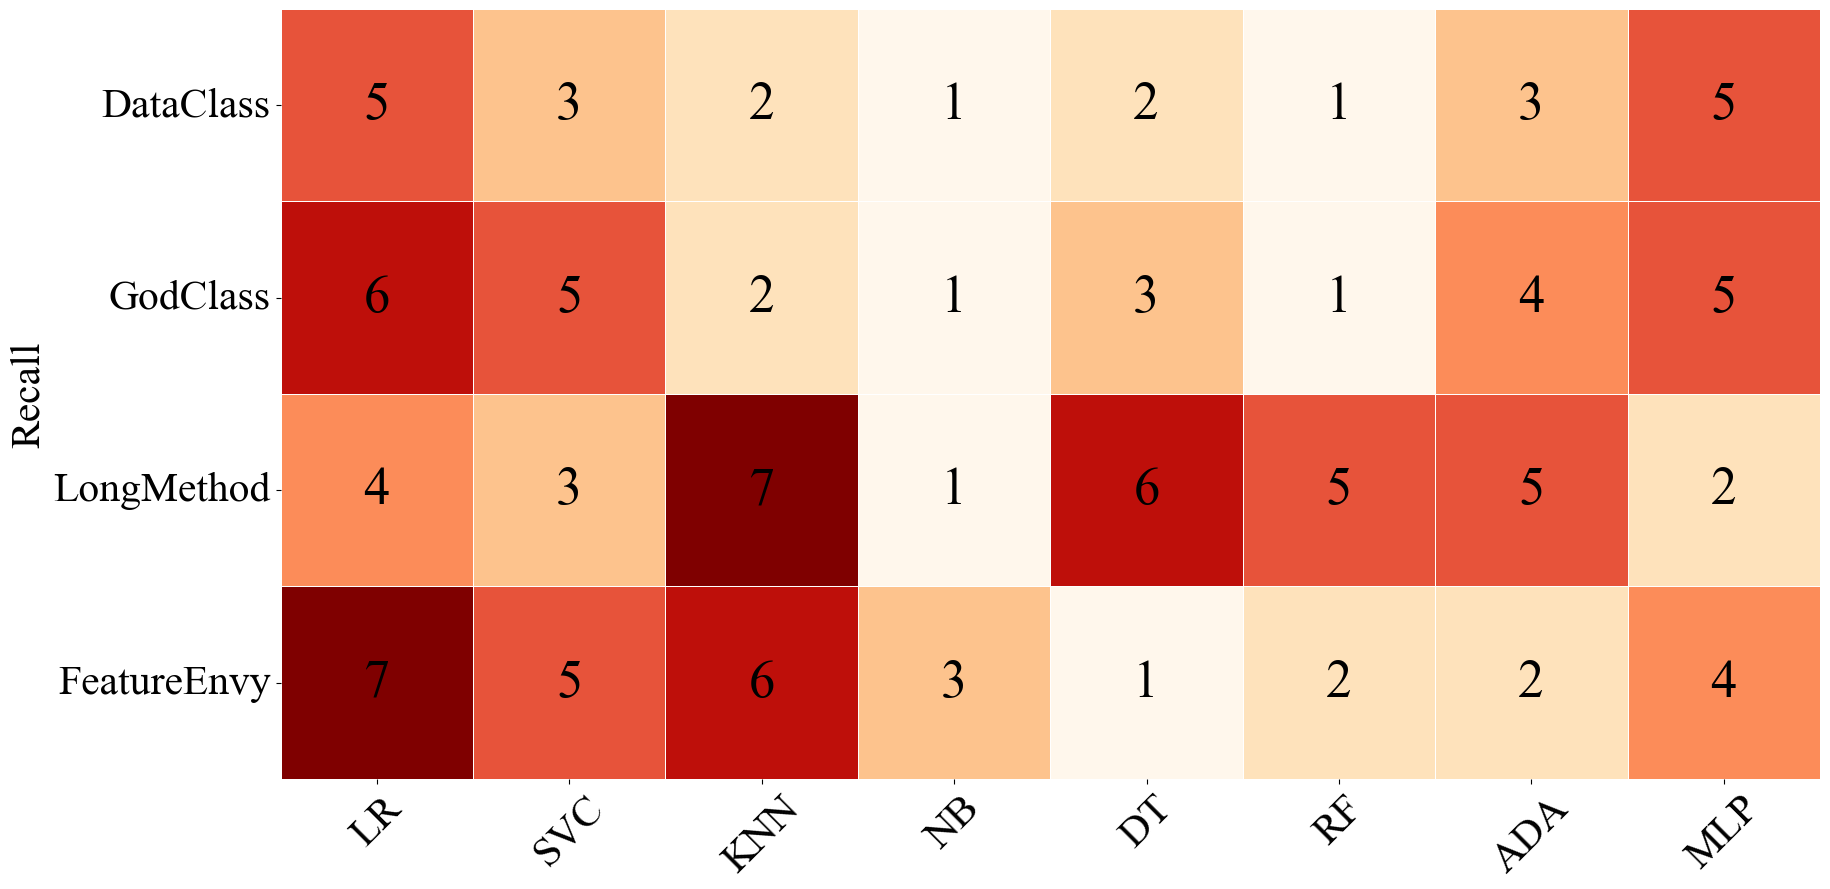

In [21]:
# 3.遍历文件名 开始画图
plt.rcParams['font.family'] = 'Times New Roman'
for file in file_list:
    data = pd.read_excel(file)
    # 获取Y轴列表
    Y_labels = data.iloc[:, 0].to_list()
    data = data.drop(data.columns[0], axis=1)
    # TODO:根据自己文件名实现修改和内容提取
    metric_name = file.strip(DATA_DIR_PATH).replace("\\","").split('#')[0]
    print(metric_name)
    plt.figure(figsize=plt_config["figsize"])
    # 设置方格内字体大小
    # 设置注释文本的样式，包括字体大小
    annot_kws = {"fontsize": plt_config["word_size"],"color": "black"}
    # 创建热力图
    sns.heatmap(data,annot=True,cmap="OrRd",yticklabels=Y_labels, square=True,cbar=False,annot_kws=annot_kws,linewidths=0.5, linecolor='white')
    plt.xticks(rotation=45, fontsize=plt_config["x_size"])
    plt.yticks(rotation=0, fontsize=plt_config["y_size"])
    plt.ylabel(metric_map[metric_name], fontsize=plt_config["y_label_size"])  # 添加说明

    # 调整布局以适应标签和标题
    plt.tight_layout()
    # 保存热力图
    plt.savefig(f"{OUTPUT_PATH}/heatmap-{metric_name}.svg",bbox_inches='tight', pad_inches=0,dpi=3000)
    # plt.show()
